In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urljoin
from IPython.display import Image, display
import shutil

In [ ]:
search_query = "iphone 13 pro max"
search_url = f"https://www.google.com/search?q={search_query}&tbm=isch"

response = requests.get(search_url)

soup = BeautifulSoup(response.content, "html.parser")

img_tags = soup.find_all("img")

image_urls = [img["src"] for img in img_tags if img.get("src")]

base_url = "https://www.google.com"
image_urls = [urljoin(base_url, img_url) if not img_url.startswith("http") else img_url for img_url in image_urls]

save_directory = "downloaded_images"
os.makedirs(save_directory, exist_ok=True)

num_images_to_download = 20

for idx, img_url in enumerate(image_urls[:num_images_to_download]):
    img_data = requests.get(img_url).content
    with open(os.path.join(save_directory, f"image_{idx}.jpg"), "wb") as f:
        f.write(img_data)

print(f"{num_images_to_download} gambar telah diunduh dan disimpan.")

20 gambar telah diunduh dan disimpan.


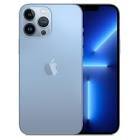

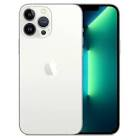

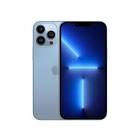

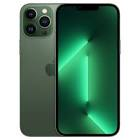

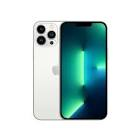

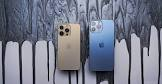

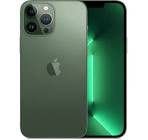

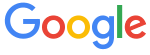

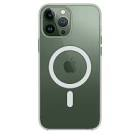

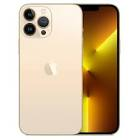

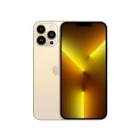

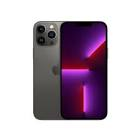

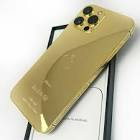

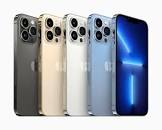

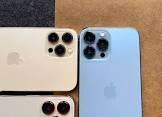

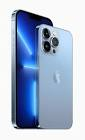

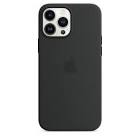

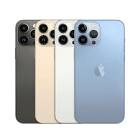

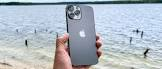

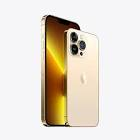

In [ ]:
image_directory = "downloaded_images"

for image_filename in os.listdir(image_directory):
    if image_filename.endswith(".jpg"):
        image_path = os.path.join(image_directory, image_filename)
        display(Image(filename=image_path))

In [ ]:
image_directory = "downloaded_images"

for image_filename in os.listdir(image_directory):
    if image_filename.endswith(".jpg"):
        image_path = os.path.join(image_directory, image_filename)
        os.remove(image_path)

print("Semua gambar telah dihapus dari direktori.")

Semua gambar telah dihapus dari direktori.


In [ ]:
image_directory = "downloaded_images"

shutil.make_archive(image_directory, 'zip', image_directory)

'/content/downloaded_images.zip'